# **Convolutional Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

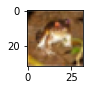

In [ ]:
plt.figure(figsize=(1, 2))
plt.imshow(X_train[0])

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

classes[y_train[0][0]]

'frog'

In [ ]:
def plot_sample(feature, target, index):
  plt.figure(figsize=(10, 2))
  plt.imshow(feature[index])
  plt.title(classes[target[index][0]])

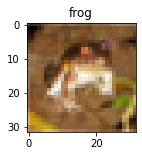

In [ ]:
plot_sample(X_train, y_train, 0)

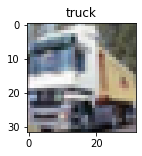

In [ ]:
plot_sample(X_train, y_train, 1)

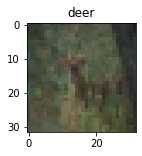

In [ ]:
plot_sample(X_train, y_train, 10)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
ann = models.Sequential([
                        layers.Flatten(input_shape=(32, 32, 3)),
                        layers.Dense(3000, activation='relu'),
                        layers.Dense(1000, activation='relu'),
                        layers.Dense(10, activation='sigmoid'),
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

In [ ]:
ann.evaluate(X_test, y_test)

In [ ]:
cnn = models.Sequential([
                         layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
                         layers.MaxPool2D((2, 2)),

                         layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
                         layers.MaxPool2D((2, 2)),
                         
                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 61s 38ms/step - loss: 1.6443 - accuracy: 0.4014
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0955 - accuracy: 0.6136
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9368 - accuracy: 0.6723
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8392 - accuracy: 0.7079
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7700 - accuracy: 0.7325
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7113 - accuracy: 0.7551
Epoch 7/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6573 - accuracy: 0.7717
Epoch 8/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6011 - accuracy: 0.7919
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.5589 - accuracy: 0.8047
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9723 - accuracy: 0.6987


[0.9723213911056519, 0.6987000107765198]